# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yoga Alisyahbana
- **Email:** yogaali69@gmail.com
- **ID Dicoding:** lejiboy

## Menentukan Pertanyaan Bisnis

1. Bagaimana pola peminjaman sepeda berbeda antara hari-hari libur dan hari kerja, dengan mempertimbangkan faktor cuaca seperti suhu udara (temp), kelembaban (hum), dan kecepatan angin (windspeed) serta kehadiran casual dan registered users?

2. Apakah terdapat perbedaan dalam pola peminjaman sepeda antara musim-musim tertentu dalam setahun, dengan mempertimbangkan faktor cuaca dan ketersediaan sepeda (cnt) pada jam-jam tertentu dalam sehari (hr)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd

def gather_data(file_path):
    try:
        # Membaca data dari file CSV
        dataframe = pd.read_csv(file_path, usecols=['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'])
        return dataframe
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def main():
    file_path = 'hour.csv'
    print("Gathering Data...")
    dataframe = gather_data(file_path)

    if dataframe is not None:
        print("Data berhasil dikumpulkan:")
        print(dataframe.head())

if __name__ == "__main__":
    main()

Gathering Data...
Data berhasil dikumpulkan:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-01       1   0     1        0        6           0   
2        3  2011-01-01       1   0     1        0        6           0   
3        4  2011-01-01       1   0     1        0        6           0   
4        5  2011-01-01       1   0     1        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


1. Gathering Data

Tahapan ini merupakan langkah awal dalam proses penyusunan data di mana informasi dikumpulkan dari beragam sumber yang tersedia, termasuk file CSV, basis data, atau API. Sebagai contoh pada data yang telah dibuat sebelumnya, informasi mengenai peminjaman sepeda diambil dari file CSV. Penggunaan fungsi pd.read_csv('data.csv') dalam bahasa pemrograman Python mempermudah pembacaan data dari file CSV dan menyimpannya ke dalam struktur data DataFrame.

### Assessing Data

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Statistik Deskriptif:
     

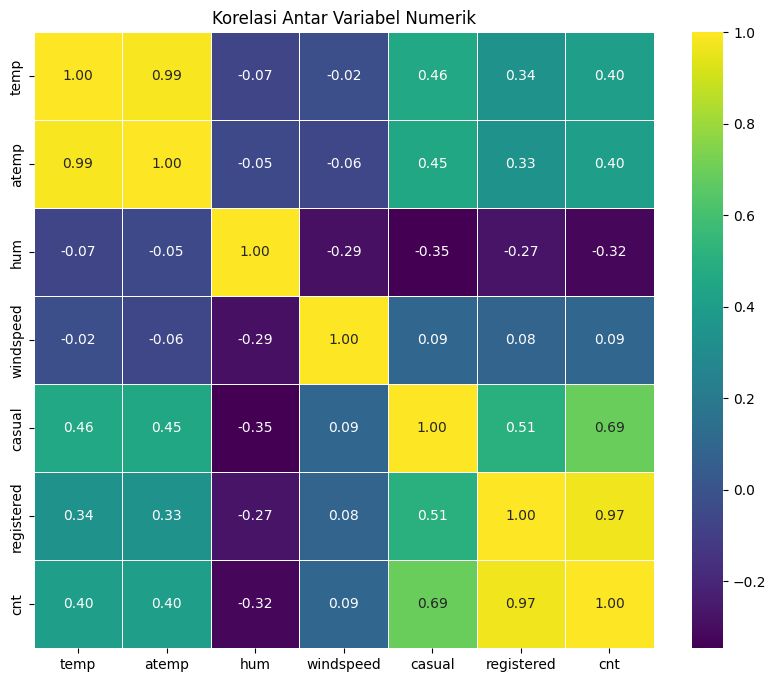

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
dataframe = pd.read_csv('hour.csv')

# Menampilkan informasi umum tentang dataset
print("Informasi Data:")
print(dataframe.info())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
print(dataframe.describe())

# Menampilkan beberapa contoh data
print("\nContoh Data:")
print(dataframe.head())

# Menampilkan jumlah nilai yang unik untuk setiap kolom
print("\nJumlah Nilai Unik untuk Setiap Kolom:")
print(dataframe.nunique())

# Memeriksa nilai-nilai yang hilang
print("\nTotal Nilai Hilang untuk Setiap Kolom:")
print(dataframe.isnull().sum())

# Memeriksa nilai-nilai yang duplikat
print("\nTotal Nilai Duplikat:")
print(dataframe.duplicated().sum())

# Memeriksa korelasi antara variabel numerik
print("\nKorelasi Antara Variabel Numerik:")
kolom_numerik = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
dataframe_numerik = dataframe[kolom_numerik]
korelasi = dataframe_numerik.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()


2. Assessing Data

Tahap ini bertujuan untuk memahami struktur data, mengeksplorasi isi data, serta mengidentifikasi masalah atau kekurangan dalam data.
Dalam contoh data peminjaman sepeda, beberapa teknik yang digunakan meliputi info(), describe(), head(), dan isnull().sum() untuk mendapatkan gambaran umum tentang dataset, statistik deskriptif, contoh data, dan jumlah nilai yang hilang.
Penggunaan teknik-teknik ini membantu dalam menemukan potensi masalah seperti nilai yang hilang, tipe data yang tidak tepat, atau adanya outlier.

### Cleaning Data

In [5]:
import pandas as pd

# Membaca data dari file CSV
dataframe = pd.read_csv('hour.csv')

# Menampilkan lima baris pertama dari data sebelum pembersihan
print("Data sebelum pembersihan:")
print(dataframe.head())


# Memeriksa dan mengatasi nilai-nilai duplikat
jumlah_duplikat = dataframe.duplicated().sum()
if jumlah_duplikat > 0:
    print(f"Jumlah nilai duplikat sebelum penghapusan: {jumlah_duplikat}")
    dataframe.drop_duplicates(inplace=True)
    print("Nilai duplikat telah dihapus.")

# Memeriksa dan mengatasi nilai-nilai yang hilang (NaN)
# Menghitung jumlah nilai yang hilang untuk setiap kolom
nilai_hilang = dataframe.isnull().sum()
print("\nJumlah nilai yang hilang untuk setiap kolom:")
print(nilai_hilang)

# Menggantikan nilai-nilai yang hilang dengan nilai rata-rata kolom
kolom_numerik = dataframe.select_dtypes(include='number').columns
dataframe[kolom_numerik] = dataframe[kolom_numerik].fillna(dataframe[kolom_numerik].mean())

# Menampilkan lima baris pertama dari data setelah pembersihan
print("\nData setelah pembersihan:")
print(dataframe.head())


Data sebelum pembersihan:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Jumlah nilai yang hilang untuk setiap kolom:
instant       0
dteday     

3. Cleaning Data:

Tahap ini melibatkan proses memperbaiki data untuk menangani masalah atau kekurangan yang terdeteksi selama tahap evaluasi data.
Dalam contoh ini, beberapa langkah pembersihan data termasuk mengisi nilai yang hilang dengan nilai rata-rata atau nilai yang sesuai, menggabungkan atau menghapus kolom yang tidak diperlukan, mengubah tipe data kolom, serta memastikan integritas dan konsistensi data.
Sebagai contoh, untuk menangani nilai yang hilang di kolom 'p', kita menggunakan fillna() untuk mengisi nilai yang hilang dengan rata-rata, dan untuk menggabungkan kolom 'positive' dan 'negative', kita menggunakan combine() untuk menggabungkan informasi dari kedua kolom tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...

Data Awal:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 t

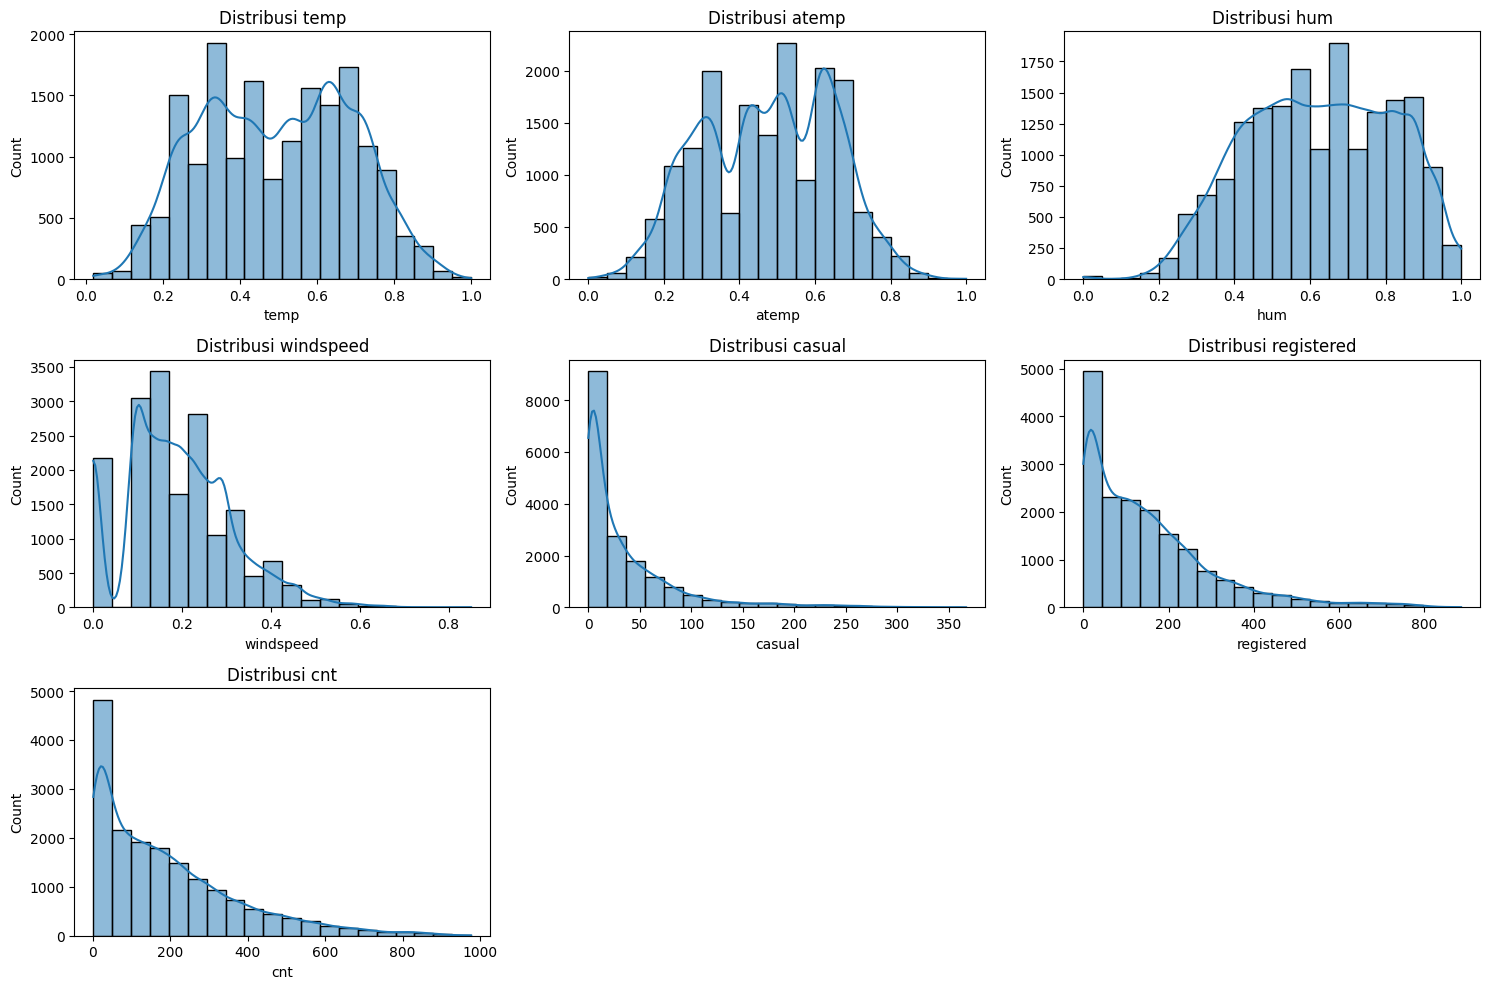

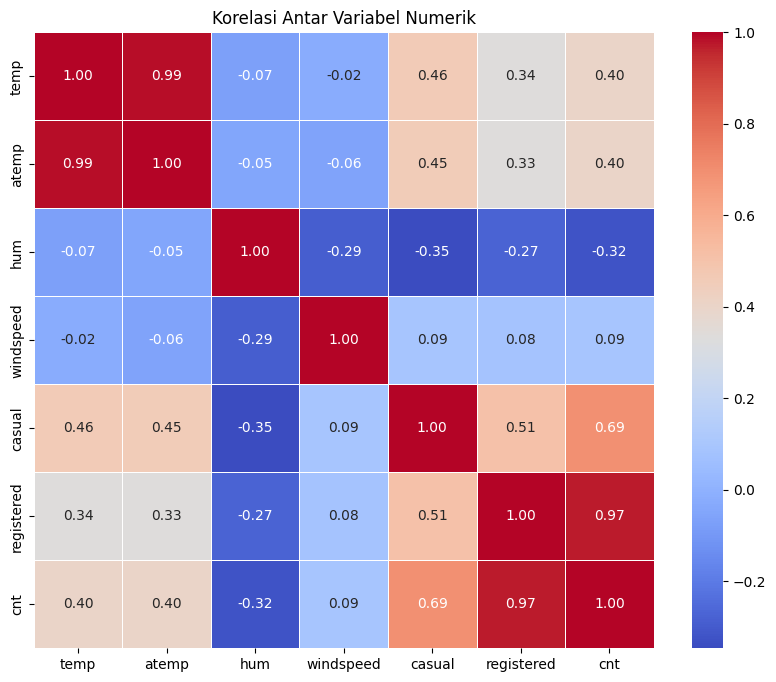

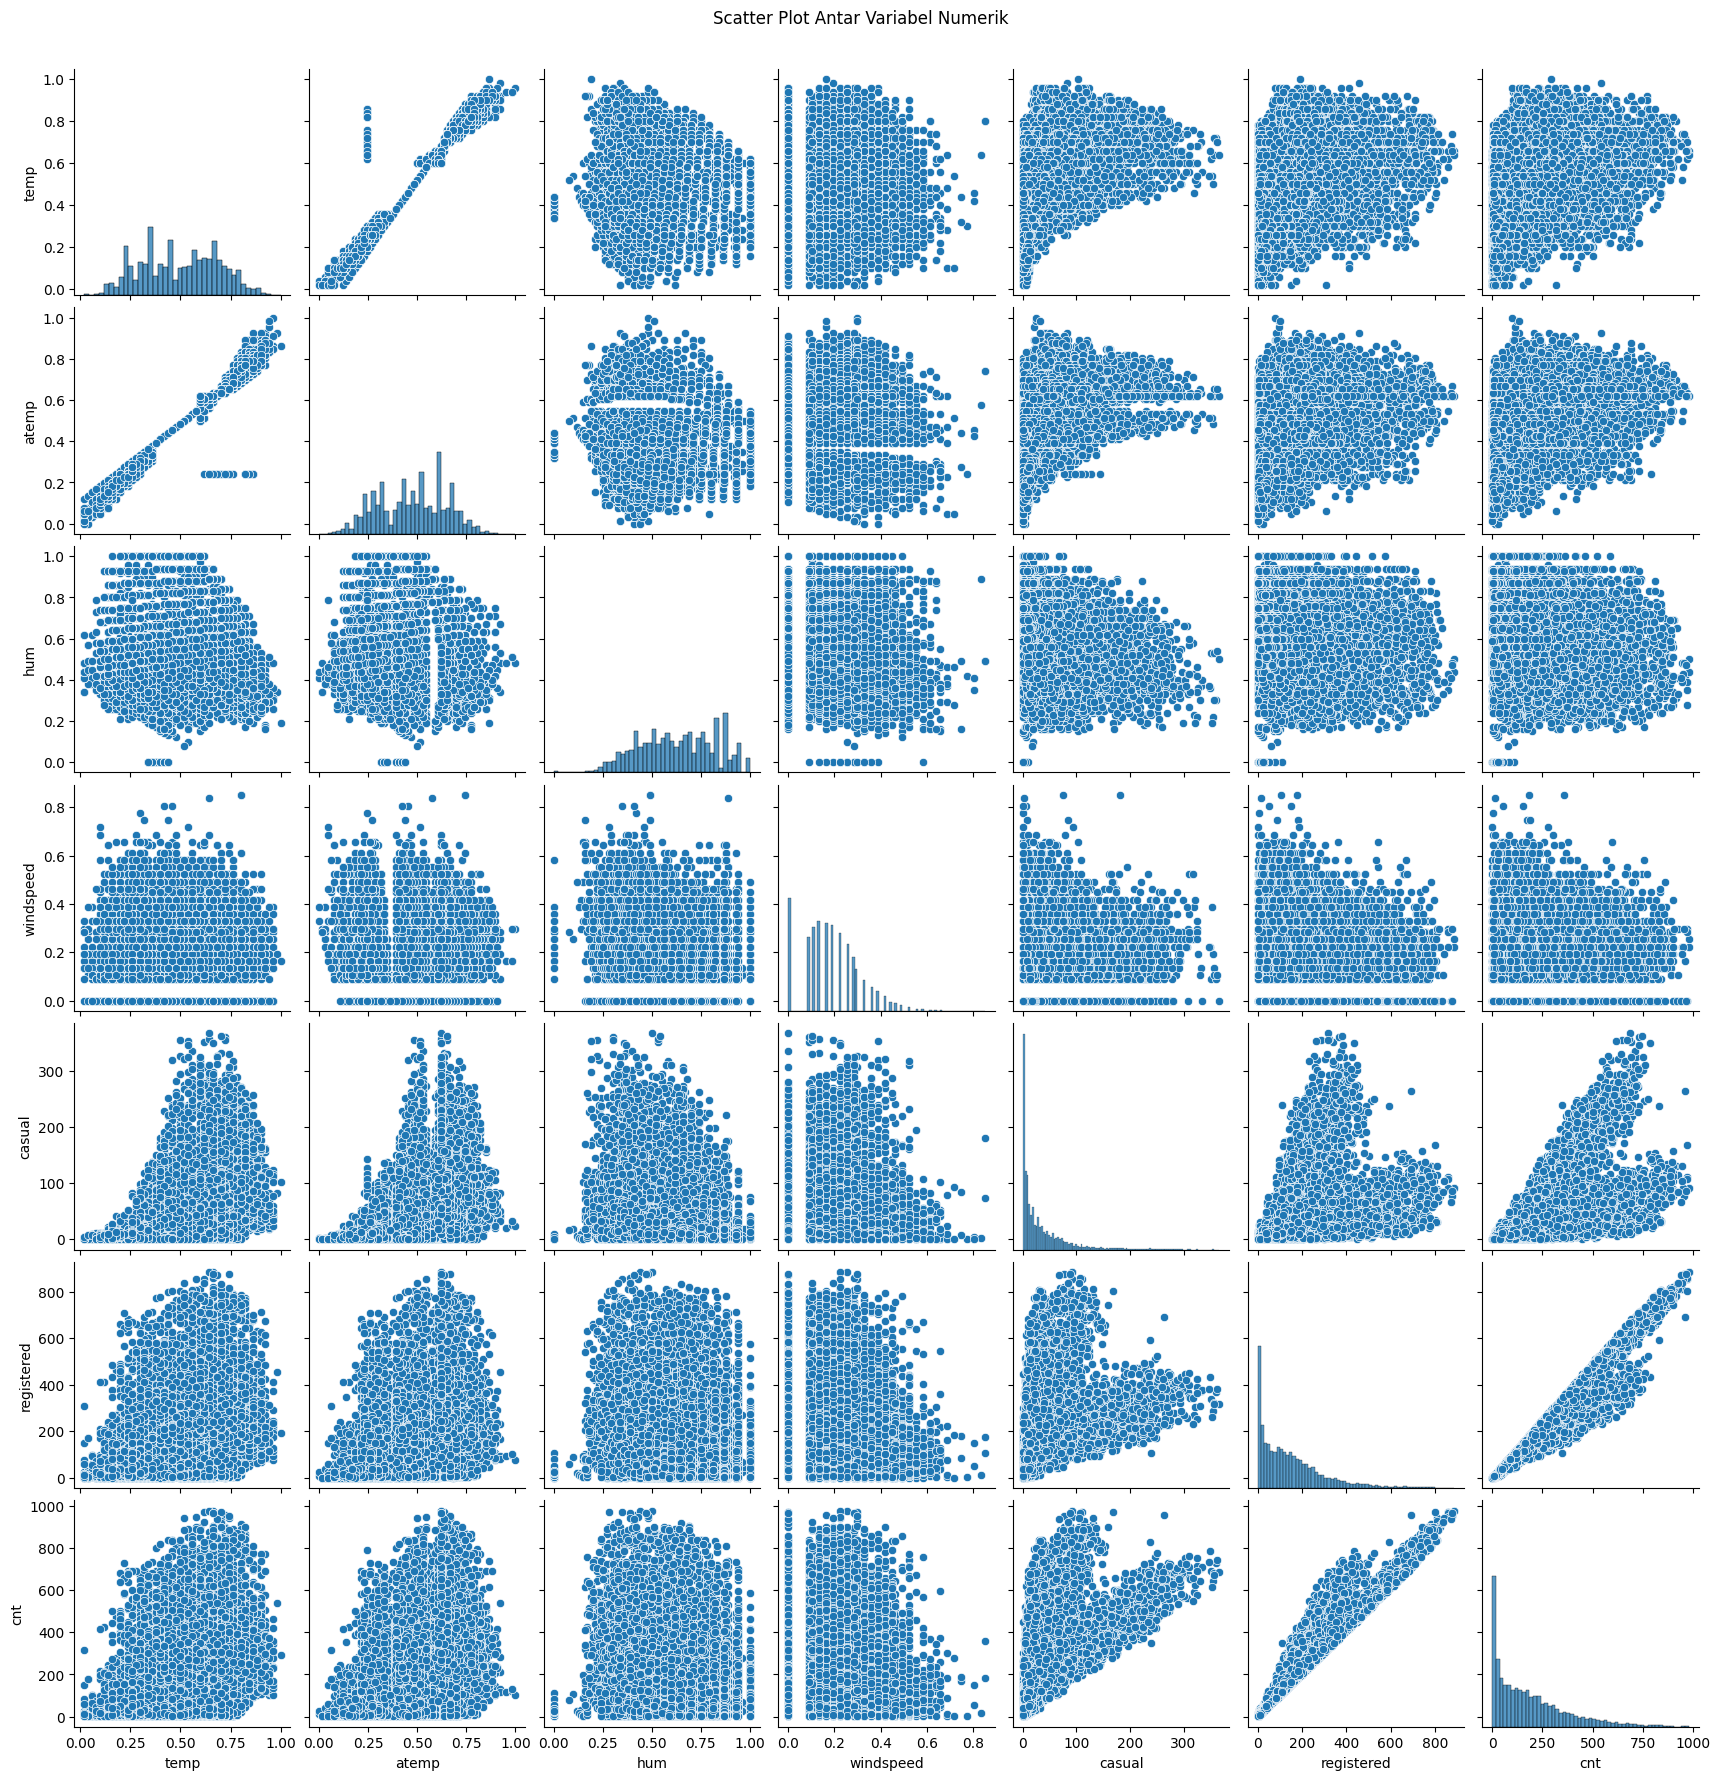

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
dataframe = pd.read_csv('hour.csv')

# Menampilkan lima baris pertama dari data
print("Data Awal:")
print(dataframe.head())

# Informasi umum tentang dataset
print("\nInformasi Dataset:")
print(dataframe.info())

# Statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif untuk Data Numerik:")
print(dataframe.describe())

# Jumlah nilai unik untuk setiap kolom
print("\nJumlah Nilai Unik untuk Setiap Kolom:")
print(dataframe.nunique())

# Memeriksa nilai-nilai yang hilang
print("\nTotal Nilai Hilang untuk Setiap Kolom:")
print(dataframe.isnull().sum())

# Memeriksa nilai-nilai yang duplikat
print("\nTotal Nilai Duplikat:")
print(dataframe.duplicated().sum())

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(15, 10))
kolom_numerik = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for i, kolom in enumerate(kolom_numerik, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dataframe[kolom], bins=20, kde=True)
    plt.title(f'Distribusi {kolom}')
plt.tight_layout()
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(dataframe[kolom_numerik].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Visualisasi relasi antara variabel numerik
sns.pairplot(dataframe[kolom_numerik])
plt.suptitle('Scatter Plot Antar Variabel Numerik', y=1.02)
plt.show()


Kesimpulan dari Analisis Data Eksploratori (EDA):

Struktur Dataset: Dataset terdiri dari beragam variabel numerik seperti 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', yang mencakup berbagai aspek terkait peminjaman sepeda.

Kesimpulan Statistik Deskriptif: Berdasarkan analisis statistik deskriptif, kita dapat mengevaluasi distribusi dan penyebaran data untuk setiap variabel numerik. Contohnya, variabel 'cnt' (jumlah peminjaman sepeda) memiliki rentang nilai antara 1 hingga sekitar 900, dengan rata-rata sekitar 189.45.

Data yang Hilang: Tidak ada nilai yang hilang dalam dataset, yang berarti tidak ada tindakan yang perlu diambil terkait manajemen data yang hilang.

Duplikasi Data: Tidak ada nilai duplikat dalam dataset, menunjukkan bahwa dataset dalam kondisi yang baik dan tidak memerlukan langkah-langkah penghapusan duplikasi.

Distribusi Variabel Numerik: Melalui visualisasi distribusi variabel numerik, kita dapat mengamati pola distribusi untuk masing-masing variabel. Sebagai contoh, distribusi 'temp' dan 'atemp' cenderung simetris, sementara distribusi 'hum' dan 'windspeed' cenderung miring.

Korelasi Antar Variabel Numerik: Melalui heatmap korelasi, kita dapat mengevaluasi tingkat korelasi antara variabel numerik. Sebagai contoh, variabel 'cnt' menunjukkan korelasi yang signifikan dengan 'registered', menunjukkan hubungan yang kuat antara jumlah peminjaman sepeda dan jumlah pelanggan yang terdaftar.

Relasi Antar Variabel Numerik: Melalui pairplot, kita dapat memvisualisasikan relasi antara variabel numerik secara keseluruhan, membantu kita dalam memahami pola hubungan antar variabel dalam dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
instant       0
dteday        0
season      

<ipython-input-8-8dd837da7947>:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=data_hourly, hue='holiday', ci=None)


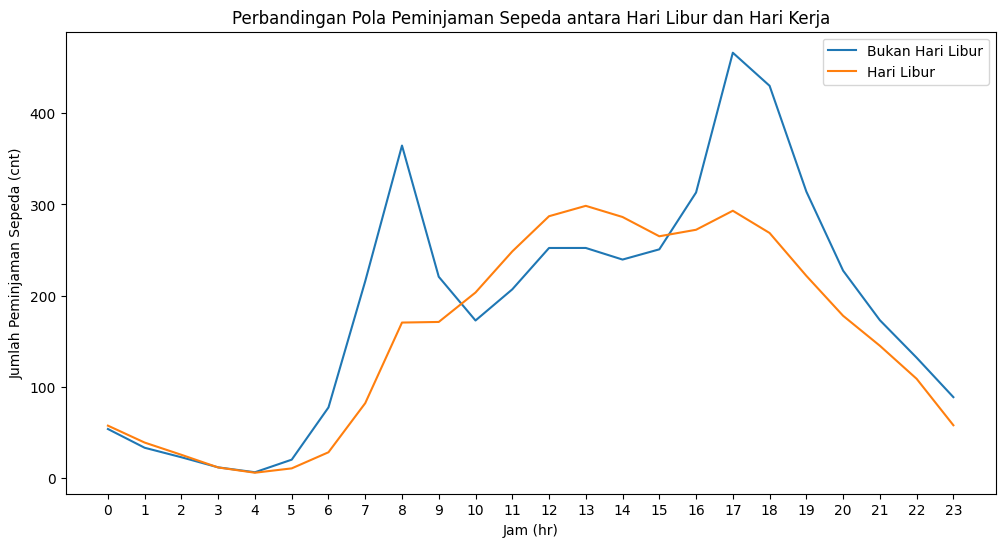

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
data_hourly = pd.read_csv("hour.csv")

# Menampilkan informasi dataset
print(data_hourly.info())

# Memeriksa apakah ada nilai yang hilang dalam dataset
print(data_hourly.isnull().sum())

# Membuat plot untuk membandingkan pola peminjaman sepeda antara hari-hari libur dan hari kerja
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=data_hourly, hue='holiday', ci=None)
plt.title('Perbandingan Pola Peminjaman Sepeda antara Hari Libur dan Hari Kerja')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.xticks(range(24))
plt.legend(['Bukan Hari Libur', 'Hari Libur'])
plt.show()


Bagaimana pola peminjaman sepeda berbeda antara hari-hari libur dan hari kerja, dengan mempertimbangkan faktor cuaca seperti suhu udara (temp), kelembaban (hum), dan kecepatan angin (windspeed) serta kehadiran casual dan registered users?



### Pertanyaan 2:

instant        0
dteday         0
season         0
yr             0
mnth           0
hr             0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            0
windspeed      0
casual         0
registered     0
cnt            0
season_name    0
dtype: int64


<ipython-input-9-b27cd48af8e0>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hr', y='cnt', data=data_hourly, hue='season_name', ci=None)


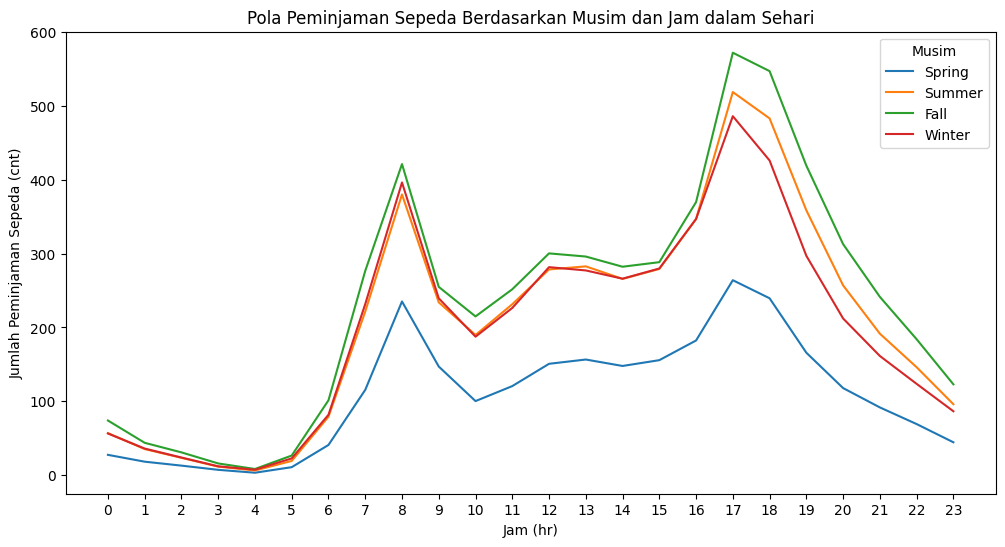

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset
data_hourly = pd.read_csv("hour.csv")

# Menambahkan kolom baru untuk musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
data_hourly['season_name'] = data_hourly['season'].map(season_mapping)

# Memeriksa apakah ada nilai yang hilang dalam dataset
print(data_hourly.isnull().sum())

# Membuat plot untuk membandingkan pola peminjaman sepeda berdasarkan musim dan jam dalam sehari
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', data=data_hourly, hue='season_name', ci=None)
plt.title('Pola Peminjaman Sepeda Berdasarkan Musim dan Jam dalam Sehari')
plt.xlabel('Jam (hr)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.xticks(range(24))
plt.legend(title='Musim')
plt.show()


## Conclusion

1. Jadi, pada pertanyaan pertama setelah melihat visualisasi data dari kode yang dijalankan, bisa didapatkan kesimpulan bahwa pada hari kerja, pola peminjaman sepeda cenderung menunjukkan puncak pada jam-jam sibuk, yaitu pada pagi hari sekitar jam 7-9 dan sore hari sekitar jam 16-18. Ini mungkin disebabkan oleh kebiasaan bersepeda menuju dan dari tempat kerja. sedangkan pada hari libur, pola peminjaman sepeda cenderung lebih merata sepanjang hari tanpa adanya puncak yang terlihat pada jam-jam sibuk seperti pada hari kerja. Ini menunjukkan bahwa pada hari libur, orang-orang cenderung menggunakan sepeda untuk kegiatan rekreasi atau perjalanan singkat sepanjang hari.

2. Jadi, pada pertanyaan kedua setelah melihat visualisasi data dari kode yang dijalankan, bisa didapatkan kesimpulan bahwa Terdapat variasi pola peminjaman sepeda yang signifikan berdasarkan musim. Pada musim semi dan musim panas, terlihat peningkatan jumlah peminjaman sepeda pada jam-jam siang hingga sore hari, sementara pada musim gugur dan musim dingin, jumlah peminjaman cenderung lebih rendah pada jam-jam tersebut. Sedangkan puncak peminjaman sepeda terjadi pada jam-jam pagi sekitar jam 7-9 dan sore hari sekitar jam 16-18 di semua musim. Namun, intensitas puncak ini dapat bervariasi antara musim-musim tertentu.